In [ ]:
# numpy is a a standard python library that contains many helpful functions for doing basic mathematical operations.
# For more information, check the documentation at https://numpy.org/doc/stable/
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import scipy.stats as st
from scipy.optimize import curve_fit
from scipy import stats
import pandas as pd
from scipy.stats import linregress


df = pd.read_csv("Lab2Data.csv")

In [2]:
df = df.dropna(how='all').reset_index(drop=True)
df = df[df['Time (s)']  != 0.00].reset_index(drop=True)
df = df.drop('trial', axis=1)
df.head(20)

,Time (s),Supply (V),Supply (A),Mass (g),Power (W),Resistance (Ohms)
0,71.67,20.20,0.49,268.5,9.8980,41.224490
1,74.00,20.20,0.49,258.5,9.8980,41.224490
2,67.73,20.20,0.49,248.5,9.8980,41.224490
3,74.46,20.20,0.49,238.5,9.8980,41.224490
4,83.67,20.20,0.49,228.5,9.8980,41.224490
5,71.52,20.20,0.49,218.5,9.8980,41.224490
6,96.21,2.68,0.06,258.5,0.1608,44.666667
7,104.51,2.67,0.06,248.5,0.1602,44.500000
8,112.05,2.67,0.06,238.5,0.1602,44.500000
9,129.09,2.67,0.06,228.5,0.1602,44.500000


In [3]:
power1 = []
power2 = []
power3 = []
power4 = []
power5 = []
power6 = []

In [4]:
chunk_size = 6
list_of_dfs = []

for i in range(0, len(df), chunk_size):
    chunk = df.iloc[i:i + chunk_size].copy() # .copy() to avoid SettingWithCopyWarning
    list_of_dfs.append(chunk)

for chunk in list_of_dfs:
    chunk['Time (s)'] = chunk['Time (s)'].cumsum()


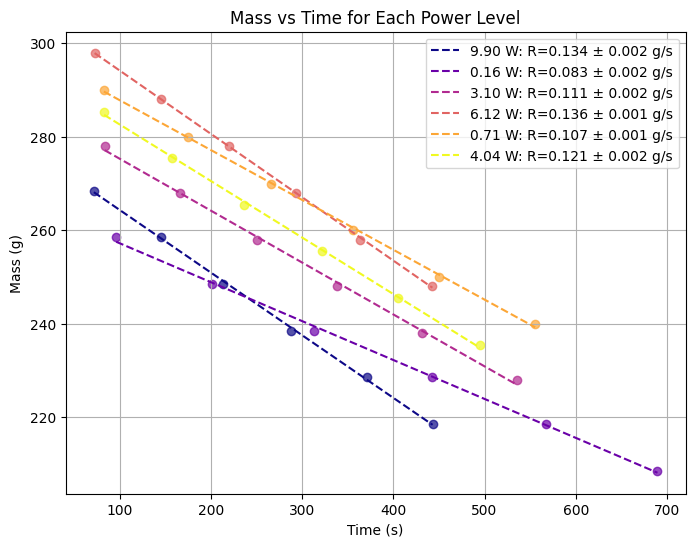

   Power (W)  dM/dt (g/s)  Evaporation Rate R (g/s)  R_error (g/s)
0   9.898000    -0.134048                  0.134048       0.001885
1   0.160300    -0.083301                  0.083301       0.001508
2   3.100050    -0.111081                  0.111081       0.002458
3   6.124967    -0.135572                  0.135572       0.000847
4   0.714783    -0.106702                  0.106702       0.001487
5   4.041367    -0.120980                  0.120980       0.001747


In [5]:
plt.figure(figsize=(8,6))
colors = plt.cm.plasma(np.linspace(0, 1, len(list_of_dfs)))

slopes = []
intercepts = []
powers = []
std_errs = []

for idx, chunk in enumerate(list_of_dfs):
    t = chunk['Time (s)'].values
    m = chunk['Mass (g)'].values
    power = chunk['Power (W)'].mean()
    
    slope, intercept, r_value, p_value, std_err = linregress(t, m)
    slopes.append(slope)
    intercepts.append(intercept)
    powers.append(power)
    std_errs.append(std_err)

    plt.scatter(t, m, color=colors[idx], alpha=0.7)
    plt.plot(t, slope*t + intercept, color=colors[idx], linestyle='--', 
             label=f'{power:.2f} W: R={-slope:.3f} ± {std_err:.3f} g/s')

plt.xlabel('Time (s)')
plt.ylabel('Mass (g)')
plt.title('Mass vs Time for Each Power Level')
plt.legend()
plt.grid(True)
plt.show()

# Summary table with errors
summary = pd.DataFrame({
    'Power (W)': powers,
    'dM/dt (g/s)': slopes,
    'Evaporation Rate R (g/s)': [-s for s in slopes],
    'R_error (g/s)': std_errs
})
print(summary)

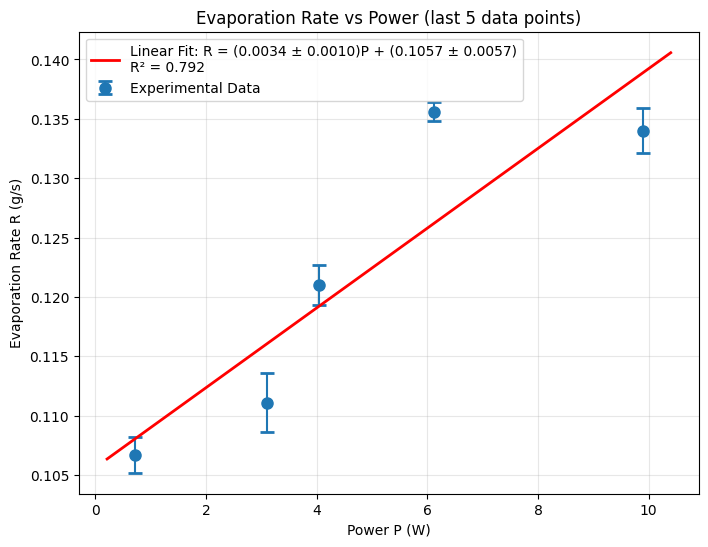

Slope (a) = 0.003358 ± 0.000993
Intercept (b) = 0.105651 ± 0.005651
R² = 0.7921


In [6]:

# Data from your table
P = [ 0.71, 3.10, 4.04, 6.12, 9.90]
R = [ 0.1067, 0.1111, 0.1210, 0.1356, 0.1340]
R_err = [ 0.0015, 0.0025, 0.0017, 0.0008, 0.0019]

# Perform linear regression
slope, intercept, r_value, p_value, slope_std_err = linregress(P, R)

# Calculate intercept standard error
n = len(P)
x_mean = np.mean(P)
Sxx = np.sum((P - x_mean)**2)
intercept_std_err = slope_std_err * np.sqrt(np.sum(np.array(P)**2) / n)

# Store the standard errors
slope_std_error = slope_std_err
intercept_std_error = intercept_std_err

# Create fit line
P_fit = np.linspace(min(P) - 0.5, max(P) + 0.5, 100)
R_fit = slope * P_fit + intercept

plt.figure(figsize=(8, 6))
plt.errorbar(P, R, yerr=R_err, fmt='o', capsize=5, capthick=2, 
             markersize=8, label='Experimental Data')
plt.plot(P_fit, R_fit, 'r-', linewidth=2, 
         label=f'Linear Fit: R = ({slope:.4f} ± {slope_std_err:.4f})P + ({intercept:.4f} ± {intercept_std_err:.4f})\nR² = {r_value**2:.3f}')

plt.xlabel('Power P (W)')
plt.ylabel('Evaporation Rate R (g/s)')
plt.title('Evaporation Rate vs Power (last 5 data points)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"Slope (a) = {slope:.6f} ± {slope_std_err:.6f}")
print(f"Intercept (b) = {intercept:.6f} ± {intercept_std_err:.6f}")
print(f"R² = {r_value**2:.4f}")

In [7]:

# Given values from linear regression
m = 0.004697
δm = 0.001324
c = 0.096470
δc = 0.006878

# Calculate L = 1/m
L = 1 / m
print(f"L = 1/m = 1/{m:.6f} = {L:.2f} J/g")

# Error propagation for L: δL = |dL/dm| * δm = | -1/m² | * δm
δL = (1 / m**2) * δm
print(f"δL = |dL/dm| * δm = | -1/m² | * δm = (1/{m**2:.6f}) * {δm:.6f} = {δL:.2f} J/g")

# Calculate P0 = c * L
P0 = c * L
print(f"P0 = c * L = {c:.6f} * {L:.2f} = {P0:.2f} W")

# Error propagation for P0: δP0 = P0 * sqrt((δc/c)² + (δL/L)²)
δP0_relative = np.sqrt((δc/c)**2 + (δL/L)**2)
δP0 = P0 * δP0_relative
print(f"δP0 = P0 * sqrt((δc/c)² + (δL/L)²)")
print(f"    = {P0:.2f} * sqrt(({δc:.6f}/{c:.6f})² + ({δL:.2f}/{L:.2f})²)")
print(f"    = {P0:.2f} * sqrt(({δc/c:.6f})² + ({δL/L:.6f})²)")
print(f"    = {P0:.2f} * sqrt({(δc/c)**2:.6f} + {(δL/L)**2:.6f})")
print(f"    = {P0:.2f} * sqrt({(δc/c)**2 + (δL/L)**2:.6f})")
print(f"    = {P0:.2f} * {δP0_relative:.6f} = {δP0:.2f} W")

print(f"\nFinal results:")
print(f"L = {L:.2f} ± {δL:.2f} J/g")
print(f"P0 = {P0:.2f} ± {δP0:.2f} W")

L = 1/m = 1/0.004697 = 212.90 J/g
δL = |dL/dm| * δm = | -1/m² | * δm = (1/0.000022) * 0.001324 = 60.01 J/g
P0 = c * L = 0.096470 * 212.90 = 20.54 W
δP0 = P0 * sqrt((δc/c)² + (δL/L)²)
    = 20.54 * sqrt((0.006878/0.096470)² + (60.01/212.90)²)
    = 20.54 * sqrt((0.071297)² + (0.281882)²)
    = 20.54 * sqrt(0.005083 + 0.079457)
    = 20.54 * sqrt(0.084541)
    = 20.54 * 0.290759 = 5.97 W

Final results:
L = 212.90 ± 60.01 J/g
P0 = 20.54 ± 5.97 W


In [10]:
# For each power level, split your time data into first half and second half
def split_early_late_analysis(list_of_dfs):
    early_results = []
    late_results = []
    
    for chunk in list_of_dfs:
        if len(chunk) < 4:  # Need at least 4 points to split
            continue
            
        power = chunk['Power (W)'].mean()
        times = chunk['Time (s)'].values
        masses = chunk['Mass (g)'].values
        
        # Split into early and late halves
        split_idx = len(times) // 2
        early_times = times[:split_idx]
        early_masses = masses[:split_idx]
        late_times = times[split_idx:]
        late_masses = masses[split_idx:]
        
        # Fit early half
        if len(early_times) >= 2:
            slope_early, intercept_early, r_early, p_early, err_early = linregress(early_times, early_masses)
            early_results.append({
                'power': power,
                'rate': abs(slope_early),
                'error': err_early
            })
        
        # Fit late half  
        if len(late_times) >= 2:
            slope_late, intercept_late, r_late, p_late, err_late = linregress(late_times, late_masses)
            late_results.append({
                'power': power,
                'rate': abs(slope_late),
                'error': err_late
            })
    
    return early_results, late_results

# Run this analysis on your actual data
early_results, late_results = split_early_late_analysis(list_of_dfs)
print(early_results)
print(late_results)

[{'power': 9.897999999999998, 'rate': 0.14102138727195263, 'error': 0.003601887208857831}, {'power': 0.1603, 'rate': 0.09231585569353905, 'error': 0.001855704305406891}, {'power': 3.10005, 'rate': 0.11984987243138495, 'error': 0.0006841993023430192}, {'power': 6.1249666666666664, 'rate': 0.13603067654909104, 'error': 0.0008440280873548874}, {'power': 0.7147833333333332, 'rate': 0.10928366136526252, 'error': 0.0008067879019621353}, {'power': 4.041366666666667, 'rate': 0.12945952325189627, 'error': 0.001506423851243809}]
[{'power': 9.897999999999998, 'rate': 0.1286115083656155, 'error': 0.005813420652462656}, {'power': 0.1603, 'rate': 0.08072789753121361, 'error': 0.0006453250622122274}, {'power': 3.10005, 'rate': 0.10080316489794688, 'error': 0.003253491306912592}, {'power': 6.1249666666666664, 'rate': 0.1339646601609799, 'error': 0.004564323276095818}, {'power': 0.7147833333333332, 'rate': 0.09980299606144676, 'error': 0.003192067879813609}, {'power': 4.041366666666667, 'rate': 0.11528

COMPARISON OF EARLY VS LATE MEASUREMENTS

EARLY ANALYSIS:
Slope = 0.004570 ± 0.001047
Intercept = 0.103016
R² = 0.8265
L = 218.8 ± 50.1 J/g
P0 = 22.5 ± 5.2 W
Difference from accepted value: 18.8 J/g


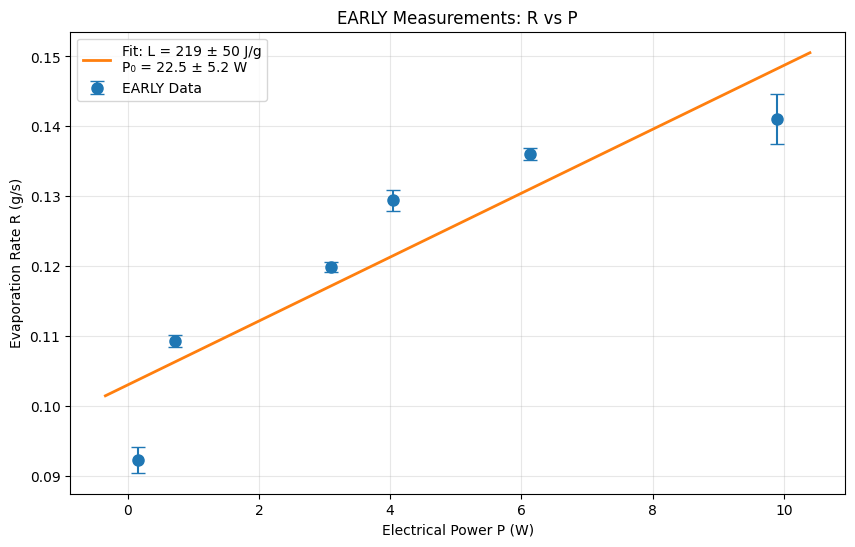


LATE ANALYSIS:
Slope = 0.004800 ± 0.001354
Intercept = 0.090636
R² = 0.7584
L = 208.3 ± 58.8 J/g
P0 = 18.9 ± 5.3 W
Difference from accepted value: 8.3 J/g


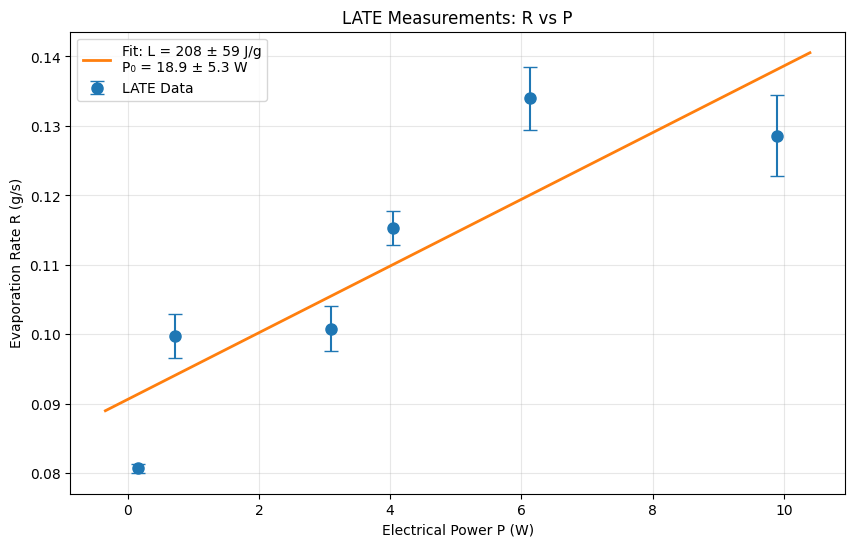


FINAL COMPARISON WITH ACCEPTED VALUE (200 J/g)
EARLY measurements: L = 218.8 ± 50.1 J/g
    Difference: 18.8 J/g (9.4%)
    P₀ = 22.5 ± 5.2 W

LATE measurements:  L = 208.3 ± 58.8 J/g
    Difference: 8.3 J/g (4.2%)
    P₀ = 18.9 ± 5.3 W

Statistical significance:
EARLY: z-score = 0.38σ (agrees within 2σ)
LATE:  z-score = 0.14σ (agrees within 2σ)

SYSTEMATIC DECREASE IN EVAPORATION RATES:
P = 9.90 W: 0.141 → 0.129 g/s (8.8% decrease)
P = 0.16 W: 0.092 → 0.081 g/s (12.6% decrease)
P = 3.10 W: 0.120 → 0.101 g/s (15.9% decrease)
P = 6.12 W: 0.136 → 0.134 g/s (1.5% decrease)
P = 0.71 W: 0.109 → 0.100 g/s (8.7% decrease)
P = 4.04 W: 0.129 → 0.115 g/s (10.9% decrease)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

early_results = [{'power': 9.897999999999998, 'rate': 0.14102138727195263, 'error': 0.003601887208857831}, {'power': 0.1603, 'rate': 0.09231585569353905, 'error': 0.001855704305406891}, {'power': 3.10005, 'rate': 0.11984987243138495, 'error': 0.0006841993023430192}, {'power': 6.1249666666666664, 'rate': 0.13603067654909104, 'error': 0.0008440280873548874}, {'power': 0.7147833333333332, 'rate': 0.10928366136526252, 'error': 0.0008067879019621353}, {'power': 4.041366666666667, 'rate': 0.12945952325189627, 'error': 0.001506423851243809}]

late_results = [{'power': 9.897999999999998, 'rate': 0.1286115083656155, 'error': 0.005813420652462656}, {'power': 0.1603, 'rate': 0.08072789753121361, 'error': 0.0006453250622122274}, {'power': 3.10005, 'rate': 0.10080316489794688, 'error': 0.003253491306912592}, {'power': 6.1249666666666664, 'rate': 0.1339646601609799, 'error': 0.004564323276095818}, {'power': 0.7147833333333332, 'rate': 0.09980299606144676, 'error': 0.003192067879813609}, {'power': 4.041366666666667, 'rate': 0.11528887938052364, 'error': 0.00243369951300254}]

def analyze_dataset(results, label):
    P = [r['power'] for r in results]
    R = [r['rate'] for r in results]
    R_err = [r['error'] for r in results]
    
    # Sort by power for better plotting
    sorted_indices = np.argsort(P)
    P = np.array(P)[sorted_indices]
    R = np.array(R)[sorted_indices]
    R_err = np.array(R_err)[sorted_indices]
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(P, R)
    
    # Calculate L and P0
    L = 1 / slope
    L_err = (1 / slope**2) * std_err
    P0 = intercept * L
    P0_err = P0 * np.sqrt((std_err/intercept)**2 + (L_err/L)**2)
    
    print(f"\n{label} ANALYSIS:")
    print("="*50)
    print(f"Slope = {slope:.6f} ± {std_err:.6f}")
    print(f"Intercept = {intercept:.6f}")
    print(f"R² = {r_value**2:.4f}")
    print(f"L = {L:.1f} ± {L_err:.1f} J/g")
    print(f"P0 = {P0:.1f} ± {P0_err:.1f} W")
    print(f"Difference from accepted value: {abs(L-200):.1f} J/g")
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.errorbar(P, R, yerr=R_err, fmt='o', capsize=5, markersize=8, 
                label=f'{label} Data')
    
    P_fit = np.linspace(min(P)-0.5, max(P)+0.5, 100)
    R_fit = slope * P_fit + intercept
    plt.plot(P_fit, R_fit, '-', linewidth=2,
             label=f'Fit: L = {L:.0f} ± {L_err:.0f} J/g\nP₀ = {P0:.1f} ± {P0_err:.1f} W')
    
    plt.xlabel('Electrical Power P (W)')
    plt.ylabel('Evaporation Rate R (g/s)')
    plt.title(f'{label} Measurements: R vs P')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return L, L_err, P0, P0_err

# Analyze both datasets
print("COMPARISON OF EARLY VS LATE MEASUREMENTS")
print("="*60)

L_early, L_early_err, P0_early, P0_early_err = analyze_dataset(early_results, "EARLY")
L_late, L_late_err, P0_late, P0_late_err = analyze_dataset(late_results, "LATE")

print("\n" + "="*60)
print("FINAL COMPARISON WITH ACCEPTED VALUE (200 J/g)")
print("="*60)
print(f"EARLY measurements: L = {L_early:.1f} ± {L_early_err:.1f} J/g")
print(f"    Difference: {abs(L_early-200):.1f} J/g ({abs(L_early-200)/200*100:.1f}%)")
print(f"    P₀ = {P0_early:.1f} ± {P0_early_err:.1f} W")

print(f"\nLATE measurements:  L = {L_late:.1f} ± {L_late_err:.1f} J/g")
print(f"    Difference: {abs(L_late-200):.1f} J/g ({abs(L_late-200)/200*100:.1f}%)")
print(f"    P₀ = {P0_late:.1f} ± {P0_late_err:.1f} W")

# Statistical significance
z_early = abs(L_early - 200) / L_early_err
z_late = abs(L_late - 200) / L_late_err

print(f"\nStatistical significance:")
print(f"EARLY: z-score = {z_early:.2f}σ {'(agrees within 2σ)' if z_early < 2 else '(differs by >2σ)'}")
print(f"LATE:  z-score = {z_late:.2f}σ {'(agrees within 2σ)' if z_late < 2 else '(differs by >2σ)'}")

# Show the systematic decrease
print(f"\nSYSTEMATIC DECREASE IN EVAPORATION RATES:")
for i, (early, late) in enumerate(zip(early_results, late_results)):
    if early['power'] == late['power']:
        decrease_pct = (early['rate'] - late['rate']) / early['rate'] * 100
        print(f"P = {early['power']:.2f} W: {early['rate']:.3f} → {late['rate']:.3f} g/s ({decrease_pct:.1f}% decrease)")